# <a>Fase 5  Creación de un Dashboard en PowerBI<a>
* Estructura del Dashboard: El tablero incluye secciones clave como resumen de ventas,
desempeño por categoría, y análisis geográfico. Las visualizaciones fueron diseñadas
para ser interactivas, permitiendo a los usuarios explorar los datos mediante filtros.
* Visualizaciones Interactivas: Se utilizaron gráficos de barras, líneas, mapas y tablas
dinámicas para representar los insights obtenidos. Los usuarios pueden filtrar los
resultados por región, segmento y fechas.

<code>Link para visualizar e interactuar con el Dashboard<code/>
https://app.powerbi.com/view?r=eyJrIjoiMmE2Y2I2NDQtMzVjYS00YmE3LTk0ODctYjIzYWY3YjE1Y2JjIiwidCI6IjY0YjY0ODRiLWYzNzYtNDQyYS1hODc1LTlhMDJlNGZjNDNiOCJ9

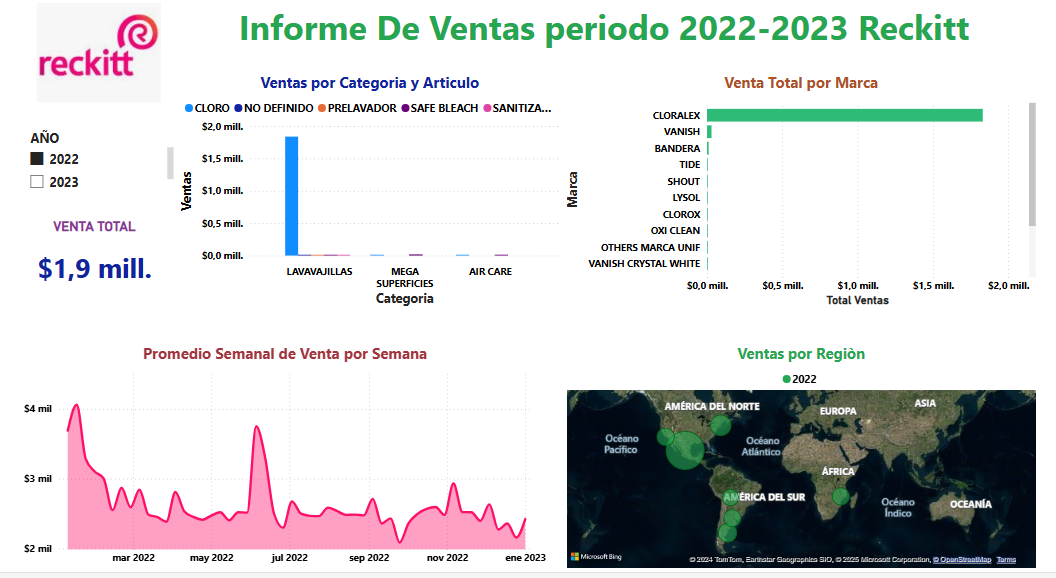

# <a>Fase 6 Predicción de Ventas con Machine Learning<a>
* Desarrollar un modelo predictivo para prever las ventas futuras de productos clave como Vanish y Lysol.                          
* Utilizar técnicas de regresión o análisis de series de tiempo, y asegurar que el modelo esté correctamente entrenado y validado.

In [34]:
import pandas as pd
import numpy as np

df = pd.read_csv("C:/Users/Isaac/Desktop/IHD/EBAC DT/CIENCIA DE DATOS/PROYECTO RECKITT/ReckittMex.csv")
df.head()

,MANUFACTURER,BRAND,ITEM_CODE,ITEM_DESCRIPTION,CATEGORY,FORMAT,ATTR1,ATTR2,ATTR3,SEGMENT,CATEGORY_DESCRIPTION,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION,YEAR,MONTH,WEEK_NUMBER,DATE
0,INDS ALEN,CLORALEX,75000592.0,CLORALEX EL RENDIDOR BOTPLAST 250ML NAL 000007...,3,LIQUIDO,CLORO,CLORO,NO DEFINIDO,BLEACH,LAVAVAJILLAS,0.034,0.142,8.500,TOTAL AUTOS SCANNING MEXICO,2022,11,45,13/11/2022
1,INDS ALEN,CLORALEX,75000592.0,CLORALEX EL RENDIDOR BOTPLAST 250ML NAL 000007...,3,LIQUIDO,CLORO,CLORO,NO DEFINIDO,BLEACH,LAVAVAJILLAS,0.002,0.009,1.000,TOTAL AUTOS SCANNING MEXICO,2022,12,48,04/12/2022
2,INDS ALEN,CLORALEX,75000592.0,CLORALEX EL RENDIDOR BOTPLAST 250ML NAL 000007...,3,LIQUIDO,CLORO,CLORO,NO DEFINIDO,BLEACH,LAVAVAJILLAS,0.432,1.956,14.400,TOTAL AUTOS SCANNING MEXICO,2022,1,3,23/01/2022
3,INDS ALEN,CLORALEX,75000592.0,CLORALEX EL RENDIDOR BOTPLAST 250ML NAL 000007...,3,LIQUIDO,CLORO,CLORO,NO DEFINIDO,BLEACH,LAVAVAJILLAS,0.233,0.779,11.095,TOTAL AUTOS SCANNING MEXICO,2022,2,5,06/02/2022
4,INDS ALEN,CLORALEX,75000592.0,CLORALEX EL RENDIDOR BOTPLAST 250ML NAL 000007...,3,LIQUIDO,CLORO,CLORO,NO DEFINIDO,BLEACH,LAVAVAJILLAS,0.055,0.251,5.500,TOTAL AUTOS SCANNING MEXICO,2022,3,9,06/03/2022


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13435 entries, 0 to 13434
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   MANUFACTURER                 13435 non-null  object        
 1   BRAND                        13435 non-null  object        
 2   ITEM_CODE                    13435 non-null  float64       
 3   ITEM_DESCRIPTION             13435 non-null  object        
 4   CATEGORY                     13435 non-null  int64         
 5   FORMAT                       13435 non-null  object        
 6   ATTR1                        13435 non-null  object        
 7   ATTR2                        13435 non-null  object        
 8   ATTR3                        13435 non-null  object        
 9   SEGMENT                      13435 non-null  object        
 10  CATEGORY_DESCRIPTION         13435 non-null  object        
 11  TOTAL_UNIT_SALES             13435 non-nu

In [40]:
df['DATE'] = pd.to_datetime(df['DATE'],format='%d/%m/%Y', errors='coerce')

In [49]:
# Filtramos los datos por Vanish y Lysol.
filtered_data = df[df['BRAND'].isin(['VANISH', 'LYSOL'])]
filtered_data.head()

,MANUFACTURER,BRAND,ITEM_CODE,ITEM_DESCRIPTION,CATEGORY,FORMAT,ATTR1,ATTR2,ATTR3,SEGMENT,CATEGORY_DESCRIPTION,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION,YEAR,MONTH,WEEK_NUMBER,DATE
2300,RECKITT,LYSOL,1.920096e+10,LYSOL SANITIZANTE DE ROPA CRISP LINEN BOT 12 L...,3,LIQUIDO,SANITIZANTE,SANITIZANTE,SANITIZANTE,SANITIZER,LAVAVAJILLAS,0.001,0.1320,1.000,TOTAL AUTOS AREA 2,2022,5,21,2022-05-29
2301,RECKITT,LYSOL,1.920096e+10,LYSOL SANITIZANTE DE ROPA CRISP LINEN BOT 12 L...,3,LIQUIDO,SANITIZANTE,SANITIZANTE,SANITIZANTE,SANITIZER,LAVAVAJILLAS,0.001,0.1050,1.000,TOTAL AUTOS SCANNING MEXICO,2022,8,32,2022-08-14
2302,RECKITT,LYSOL,1.920096e+10,LYSOL SANITIZANTE DE ROPA CRISP LINEN BOT 12 L...,3,LIQUIDO,SANITIZANTE,SANITIZANTE,SANITIZANTE,SANITIZER,LAVAVAJILLAS,0.001,0.1050,1.000,TOTAL AUTOS AREA 2,2022,8,32,2022-08-14
2303,RECKITT,LYSOL,1.920096e+10,LYSOL SANITIZANTE DE ROPA CRISP LINEN BOT 12 L...,3,LIQUIDO,SANITIZANTE,SANITIZANTE,SANITIZANTE,SANITIZER,LAVAVAJILLAS,0.001,0.1320,1.000,TOTAL AUTOS SCANNING MEXICO,2022,5,21,2022-05-29
4356,RECKITT,VANISH,7.501060e+13,VANISH LIQUIDO SIN AROMA GARRAFON 6 LTS NAL 75...,3,LIQUIDO,SAFE BLEACH,FABRIC TREATMENT,ROSA,LIQUID y GEL,LAVAVAJILLAS,0.364,16.6745,3.991,TOTAL AUTOS SCANNING MEXICO,2022,5,9,2022-02-20


In [43]:
# resumen estadístico de las columnas relevantes
stats_val = df_filt[['TOTAL_UNIT_SALES','TOTAL_VALUE_SALES']].describe()
stats_val

,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES
count,6396.000000,6396.000000
mean,0.419163,9.560842
std,1.575592,24.025472
min,0.001000,0.001000
25%,0.005000,0.229000
50%,0.029000,1.468500
75%,0.142000,8.373000
max,22.855000,334.400000


* Los datos están filtrados para las marcas Vanish y Lysol, con un total de 6,396 registros.                                     
  Las ventas unitarias y en valor tienen un amplio rango, lo que sugiere variabilidad entre los productos o las regiones.

1.- Realizar un análisis temporal para identificar tendencias y patrones.                                                       
2.- Decidir entre un modelo de regresión o series de tiempo, dependiendo del comportamiento observado.

C:\Users\Isaac\AppData\Local\Temp\ipykernel_17848\1922999469.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['MONTHLY'] = filtered_data['DATE'].dt.to_period('M')


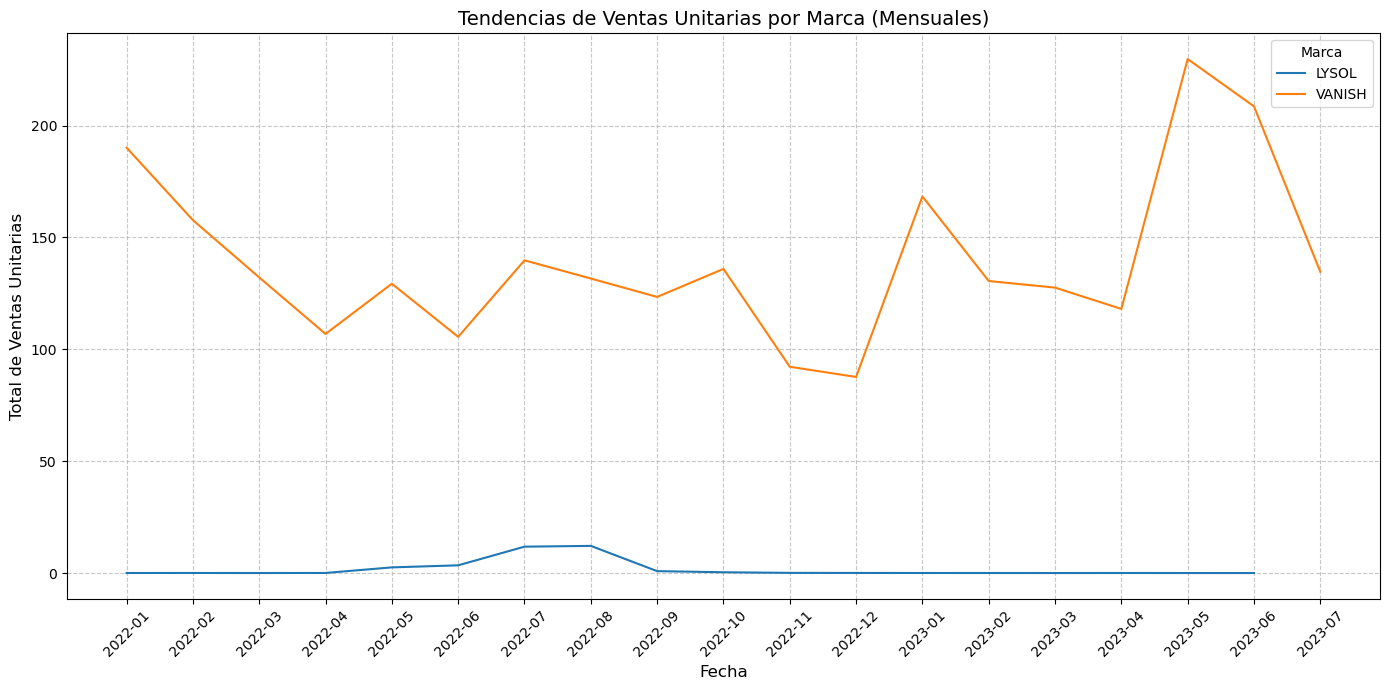

In [50]:
import matplotlib.pyplot as plt

# Crear un dataframe por marca y calcular la suma mensual de ventas unitarias
filtered_data['MONTHLY'] = filtered_data['DATE'].dt.to_period('M')
monthly_sales = filtered_data.groupby(['BRAND', 'MONTHLY'])['TOTAL_UNIT_SALES'].sum().reset_index()

# Configurar el gráfico de tendencias
plt.figure(figsize=(14, 7))

for brand in monthly_sales['BRAND'].unique():
    brand_data = monthly_sales[monthly_sales['BRAND'] == brand]
    plt.plot(brand_data['MONTHLY'].astype(str), brand_data['TOTAL_UNIT_SALES'], label=brand)

# Personalización del gráfico
plt.title("Tendencias de Ventas Unitarias por Marca (Mensuales)", fontsize=14)
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Total de Ventas Unitarias", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Marca")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


* El gráfico muestra las tendencias mensuales de las ventas unitarias para las marcas Vanish y Lysol. Observamos:

<a>Patrones de ventas:<a/>

* Las ventas presentan fluctuaciones significativas en el tiempo.
* Podría haber factores estacionales o eventos específicos que influyen en las ventas.
    
<code>Enfoque a seguir: Regresión múltiple, que nos permitirá incluir variables independientes como región, categoría, formato, entre otras, para predecir las ventas futuras.<code/>

### <code>Pasos para el modelado con regresión múltiple:<code/>
    1.- Preparación de datos.
    2.- División del conjunto de datos.
    3.- Entrenamiento del modelo.
    4.- Evaluación del modelo.
    5.- Predicción y visualización

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [54]:
# Seleccionar columnas relevantes para la regresión
columns_to_use = ['REGION', 'CATEGORY', 'FORMAT', 'YEAR', 'MONTH', 'WEEK_NUMBER', 'TOTAL_UNIT_AVG_WEEKLY_SALES']
target_column = 'TOTAL_UNIT_SALES'

# Filtrar el dataset con las columnas seleccionadas
model_data = filtered_data[columns_to_use + [target_column]]

# Codificar variables categóricas
categorical_columns = ['REGION', 'CATEGORY', 'FORMAT']
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_categorical = encoder.fit_transform(model_data[categorical_columns])

# Crear un nuevo DataFrame con las variables codificadas
encoded_columns = encoder.get_feature_names_out(categorical_columns)
encoded_df = pd.DataFrame(encoded_categorical, columns=encoded_columns, index=model_data.index)

# Combinar las variables codificadas con las numéricas
numerical_data = model_data.drop(columns=categorical_columns)
prepared_data = pd.concat([numerical_data, encoded_df], axis=1)

# Dividir los datos en entrenamiento y prueba
X = prepared_data.drop(columns=[target_column])
y = prepared_data[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# Verificar la estructura de los datos preparados
X_train.head()

,YEAR,MONTH,WEEK_NUMBER,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION_TOTAL AUTOS AREA 2,REGION_TOTAL AUTOS AREA 3,REGION_TOTAL AUTOS AREA 4,REGION_TOTAL AUTOS AREA 5,REGION_TOTAL AUTOS AREA 6,REGION_TOTAL AUTOS SCANNING MEXICO,CATEGORY_3,CATEGORY_4,FORMAT_LIQUIDO,FORMAT_POLVO
7196,2022,9,35,3.000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7831,2022,3,12,2.333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9505,2023,5,18,2.776,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9435,2023,3,11,4.244,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6950,2022,4,15,2.745,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [58]:
y_train.head()

7196    0.006
7831    0.014
9505    0.705
9435    0.191
6950    0.129
Name: TOTAL_UNIT_SALES, dtype: float64

### <code>Modelo de regresión Lineal<code/>

In [61]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [62]:
# Verificar los coeficientes del modelo
coefficients = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': model.coef_
}).sort_values(by='Coeficiente', ascending=False)

coefficients

,Variable,Coeficiente
9,REGION_TOTAL AUTOS SCANNING MEXICO,1.053334
3,TOTAL_UNIT_AVG_WEEKLY_SALES,0.238937
6,REGION_TOTAL AUTOS AREA 4,0.216164
8,REGION_TOTAL AUTOS AREA 6,0.194602
4,REGION_TOTAL AUTOS AREA 2,0.183806
11,CATEGORY_4,0.088122
13,FORMAT_POLVO,0.088122
5,REGION_TOTAL AUTOS AREA 3,0.062124
1,MONTH,0.007495
7,REGION_TOTAL AUTOS AREA 5,0.004273


#### Evaluación del modelo
Ahora evaluaremos el modelo utilizando el conjunto de prueba (X_test y y_test) para calcular métricas de desempeño como:

* Error Cuadrático Medio (MSE): Evalúa la magnitud del error promedio cuadrado.
* Error Absoluto Medio (MAE): Indica el promedio de las diferencias absolutas entre los valores reales y predichos.
* Coeficiente de Determinación (R²): Mide qué tan bien se ajusta el modelo a los datos.

In [63]:
# Generar predicciones para el conjunto de prueba
y_pred = model.predict(X_test)

In [65]:
# Calcular métricas de desempeño
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Resultados
print(f'Error Cuadrático Medio (MSE): {mse:.2f}')
print(f'Error Absoluto Medio (MAE): {mae:.2f}')
print(f'Coeficiente de Determinación (R²): {r2:.2f}')

Error Cuadrático Medio (MSE): 1.55
Error Absoluto Medio (MAE): 0.50
Coeficiente de Determinación (R²): 0.40


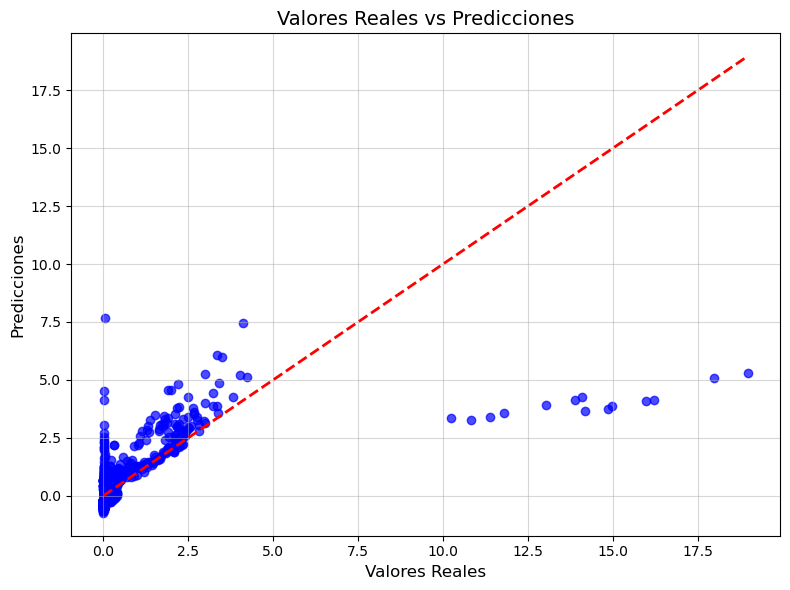

In [66]:
# Crear gráfico de valores reales vs predicciones
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Valores Reales vs Predicciones", fontsize=14)
plt.xlabel("Valores Reales", fontsize=12)
plt.ylabel("Predicciones", fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

* El gráfico muestra la relación entre valores reales y predichos: cuanto más cerca estén de la línea roja, mejor es el ajuste del modelo.
* Las métricas nos indican el desempeño numérico del modelo.

### <code>Generar predicciones futuras<code/>

In [69]:
# Predicciones para el conjunto de prueba
future_pred = model.predict(X_test)

# Crear un DataFrame con valores reales y predichos
df_result = pd.DataFrame({
    'Real': y_test,
    'Prediccion': future_pred
})

In [72]:
# Mostrar los primeros registros de resultados
df_result.head()

,Real,Prediccion
9319,0.033,0.720342
12892,2.827,3.048583
9222,0.156,-0.160283
8378,0.005,0.553342
4488,0.008,-0.255091


#### Visualización de las predicciones futuras
* Graficaremos los valores reales y predichos para identificar la calidad de las predicciones.

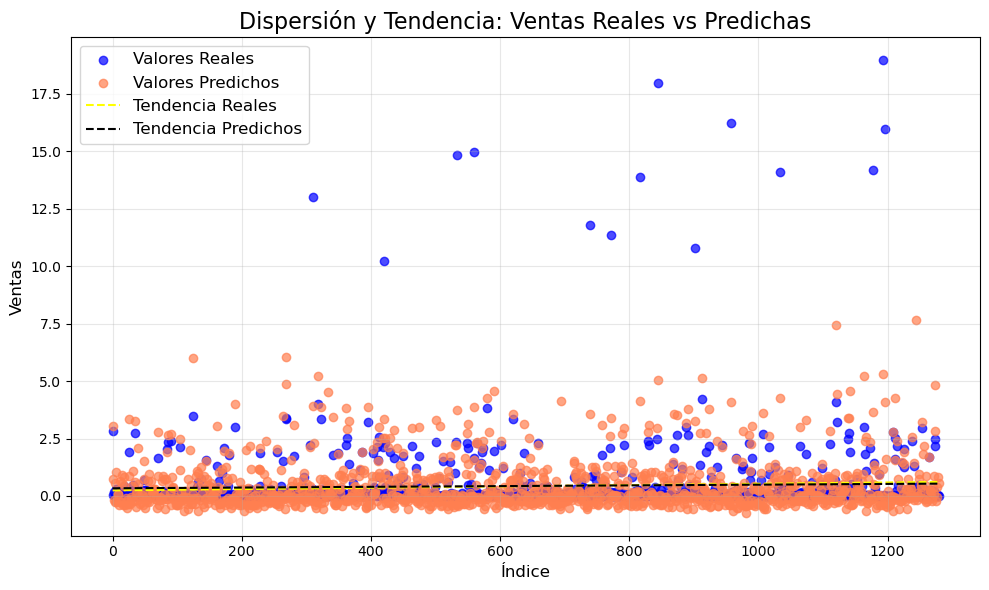

In [80]:
# Gráfico de dispersión con línea de tendencia
plt.figure(figsize=(10, 6))

# Puntos reales vs predichos
plt.scatter(range(len(y_test)), y_test.values, label="Valores Reales", color='blue', alpha=0.7)
plt.scatter(range(len(future_pred)), future_pred, label="Valores Predichos", color='coral', alpha=0.7)

# Línea de tendencia para valores reales
z_real = np.polyfit(range(len(y_test)), y_test.values, 1)
p_real = np.poly1d(z_real)
plt.plot(range(len(y_test)), p_real(range(len(y_test))), label="Tendencia Reales", color='yellow', linestyle='--')

# Línea de tendencia para valores predichos
z_pred = np.polyfit(range(len(future_pred)), future_pred, 1)
p_pred = np.poly1d(z_pred)
plt.plot(range(len(future_pred)), p_pred(range(len(future_pred))), label="Tendencia Predichos", color='black', linestyle='--')

# Títulos y etiquetas
plt.title("Dispersión y Tendencia: Ventas Reales vs Predichas", fontsize=16)
plt.xlabel("Índice", fontsize=12)
plt.ylabel("Ventas", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Resultados y Recomendaciones
### <code>Insights Clave:<code/>

* Identificación de segmentos de alto y bajo desempeño en ventas.
* Predicciones confiables para planificar estrategias de marketing.

   <code>Recomendaciones:<code/>

* Focalizar campañas promocionales en segmentos específicos.
* Continuar refinando el modelo con datos adicionales como promociones y cambios de precio.

   <code>Futuras Mejoras:<code/>

* Implementar modelos avanzados como Random Forest o Gradient Boosting.
* Automatizar la actualización de los datos en el dashboard.